In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Problem definition

**Context**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information

1) **id:** unique identifier

2) **gender:** "Male", "Female" or "Other"

3) **age:** age of the patient

4) **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) **ever_married: "No" or "Yes"

7) **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) **Residence_type:** "Rural" or "Urban"

9) **avg_glucose_level:** average glucose level in blood

10) **bmi:** body mass index

11) **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) **stroke:** 1 if the patient had a stroke or 0 if not

**Note:** "Unknown" in smoking_status means that the information is unavailable for this patient

Acknowledgements (Confidential Source) - Use only for educational purposes If you use this dataset in your research, please credit the author.

# Libraries needed for this Study

Let us import necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.7f' % x)

## Reading the Dataset

In [3]:
df0 = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
df = df0.copy()

In [5]:
df.head()

id  gender        age  hypertension  heart_disease ever_married  \
0   9046    Male 67.0000000             0              1          Yes   
1  51676  Female 61.0000000             0              0          Yes   
2  31112    Male 80.0000000             0              1          Yes   
3  60182  Female 49.0000000             0              0          Yes   
4   1665  Female 79.0000000             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban        228.6900000 36.6000000   
1  Self-employed          Rural        202.2100000        NaN   
2        Private          Rural        105.9200000 32.5000000   
3        Private          Urban        171.2300000 34.4000000   
4  Self-employed          Rural        174.1200000 24.0000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1

## EDA

**A General Looking at the Data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


describe() function gives us a general descriptive summary of each continuous attribute such as the count, mean, the min, max values and some percentiles as well.

In [7]:
df.describe().T

count          mean           std        min  \
id                5110.0000000 36517.8293542 21161.7216248 67.0000000   
age               5110.0000000    43.2266145    22.6126467  0.0800000   
hypertension      5110.0000000     0.0974560     0.2966067  0.0000000   
heart_disease     5110.0000000     0.0540117     0.2260630  0.0000000   
avg_glucose_level 5110.0000000   106.1476771    45.2835602 55.1200000   
bmi               4909.0000000    28.8932369     7.8540667 10.3000000   
stroke            5110.0000000     0.0487280     0.2153199  0.0000000   

                            25%           50%           75%           max  
id                17741.2500000 36932.0000000 54682.0000000 72940.0000000  
age                  25.0000000    45.0000000    61.0000000    82.0000000  
hypertension          0.0000000     0.0000000     0.0000000     1.0000000  
heart_disease         0.0000000     0.0000000     0.0000000     1.0000000  
avg_glucose_level    77.2450000    91.8850000   114.0900000   271.7400000  
bmi                  23.5000000    28.1000000    33.1000000    97.6000000  
stroke                0.0000000     0.0000000     0.0000000     1.0000000

In [8]:
df.describe(include=object).T

count unique           top  freq
gender          5110      3        Female  2994
ever_married    5110      2           Yes  3353
work_type       5110      5       Private  2925
Residence_type  5110      2         Urban  2596
smoking_status  5110      4  never smoked  1892

In [9]:
print(f"Data has {df.shape[0]} instances and {df.shape[1] - 1} attributes.")

Data has 5110 instances and 11 attributes.


In [10]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [11]:
df.duplicated().value_counts()

False    5110
dtype: int64

In [12]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [13]:
missing(df)

Missing_Number  Missing_Percent
bmi                           201        0.0393346
id                              0        0.0000000
gender                          0        0.0000000
age                             0        0.0000000
hypertension                    0        0.0000000
heart_disease                   0        0.0000000
ever_married                    0        0.0000000
work_type                       0        0.0000000
Residence_type                  0        0.0000000
avg_glucose_level               0        0.0000000
smoking_status                  0        0.0000000
stroke                          0        0.0000000

Distribution of the target variable is one of the most important things in a classification problem. So let's a close look at how its values are distributed.

In [14]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

It's clear that the proportinate distribution for each class is not the case here. So we should assume an imbalanced data in the given case.

### Data Cleaning

In "id" column, all the values are unique. Let's drop the "id" column.

In [15]:
df.drop('id', axis=1, inplace=True)

In [16]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

The column of 'Residence_type' begins with uppercase while others are not. To make a standardize grammer to prevent mistake we will change all column names into lowercase

In [17]:
df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [18]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [19]:
#df.bmi.value_counts(dropna=False).index.sort_values()

In [20]:
#df[df.bmi.isnull()][['age','bmi']].sort_values(by='age').sample(20)

In [21]:
# def fill_most(df0, group_col, col_name):
#     '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
#     for group in list(df0[group_col].unique()):
#         cond = df0[group_col]==group
#         mode = list(df0[cond][col_name].mode())
#         if mode != []:
#             df0.loc[cond, col_name] = df0.loc[cond, col_name].fillna(df0[cond][col_name].mode()[0])
#         else:
#             df0.loc[cond, col_name] = df0.loc[cond, col_name].fillna(df0[col_name].mode()[0])
#     print("Number of NaN : ",df0[col_name].isnull().sum())
#     print("------------------")
#     print(df0[col_name].value_counts(dropna=False))

In [22]:
#fill_most(df, 'age', 'bmi')

In [23]:
#df.bmi.value_counts(dropna=False).isnull().sum()

In [24]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Before deeping into the analysis it would be benefical to examine the correlation among variables using heatmap.

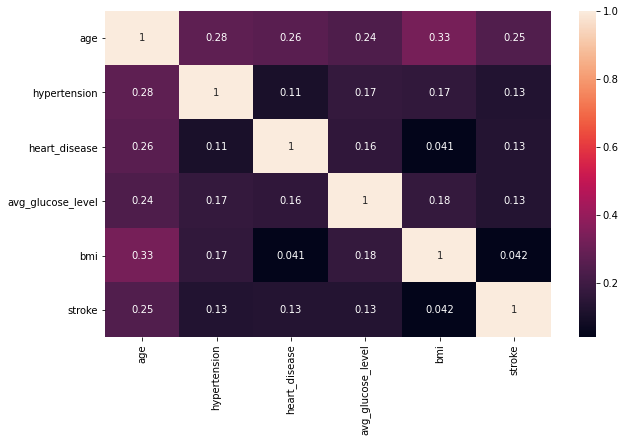

In [25]:
sns.heatmap(df.corr(), annot=True);

Let's split our features into two part, numerical and categorical, for easing our further examination. 

In [26]:
numerical= df.drop(['stroke'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print("\033[1m", "Numerical Columns:", "\033[0;0m",  numerical)
print("------------------------------------------------------------------------------------------------------------------")
print("\033[1m", "Categorical Columns:", "\033[0;0m", categorical)

 Numerical Columns:  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')
------------------------------------------------------------------------------------------------------------------
 Categorical Columns:  Index(['gender', 'ever_married', 'work_type', 'residence_type',
       'smoking_status'],
      dtype='object')


# The Examination of Target Variable

In [27]:
df['stroke'].describe().T

count   5110.0000000
mean       0.0487280
std        0.2153199
min        0.0000000
25%        0.0000000
50%        0.0000000
75%        0.0000000
max        1.0000000
Name: stroke, dtype: float64

In [28]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [29]:
print( f"Skewness: {df['stroke'].skew()}")

Skewness: 4.193284486071313


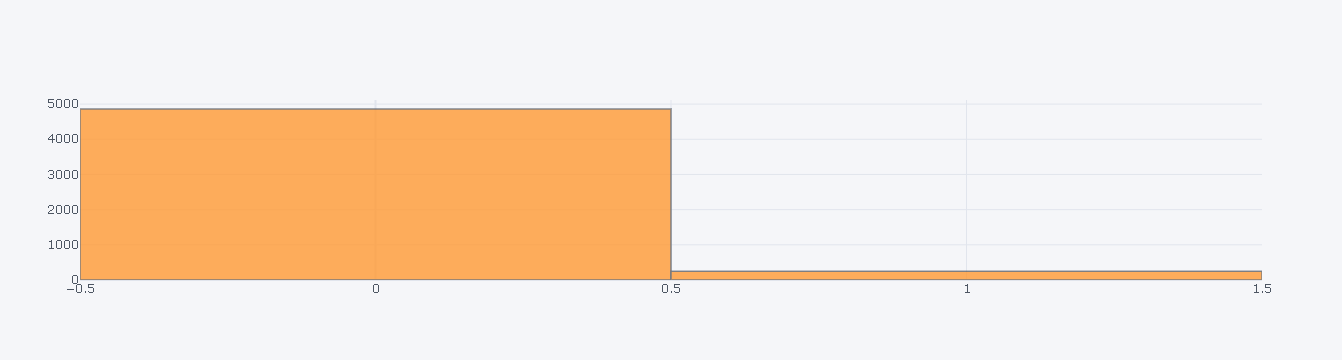

In [30]:
df['stroke'].iplot(kind='hist')

# Numerical Features

In [31]:
df[numerical].describe().T

count        mean        std        min        25%  \
age               5110.0000000  43.2266145 22.6126467  0.0800000 25.0000000   
hypertension      5110.0000000   0.0974560  0.2966067  0.0000000  0.0000000   
heart_disease     5110.0000000   0.0540117  0.2260630  0.0000000  0.0000000   
avg_glucose_level 5110.0000000 106.1476771 45.2835602 55.1200000 77.2450000   
bmi               4909.0000000  28.8932369  7.8540667 10.3000000 23.5000000   

                         50%         75%         max  
age               45.0000000  61.0000000  82.0000000  
hypertension       0.0000000   0.0000000   1.0000000  
heart_disease      0.0000000   0.0000000   1.0000000  
avg_glucose_level 91.8850000 114.0900000 271.7400000  
bmi               28.1000000  33.1000000  97.6000000

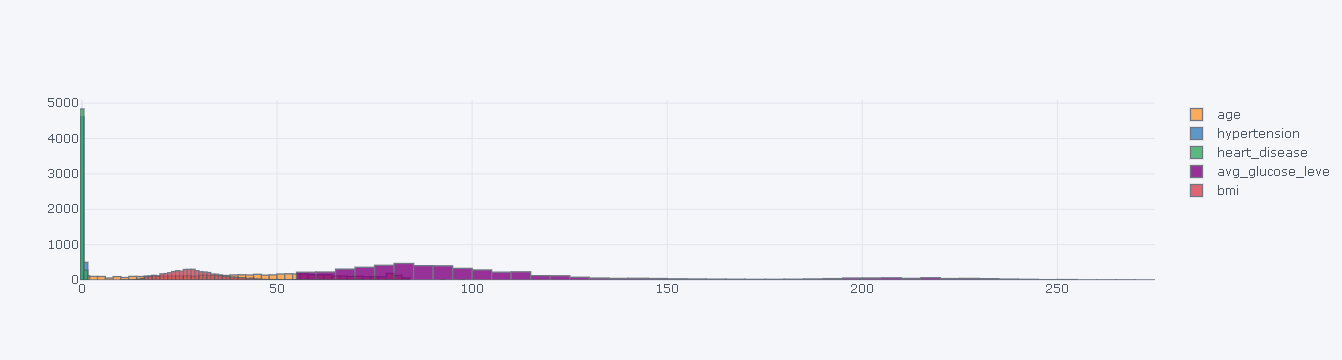

In [32]:
df[numerical].iplot(kind='hist');

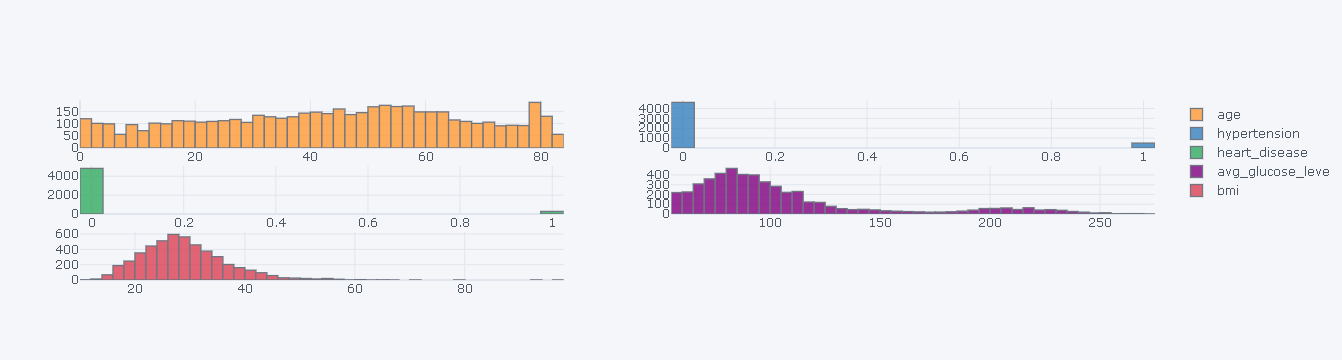

In [33]:
df[numerical].iplot(kind='histogram',subplots=True,bins=50)

In [34]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

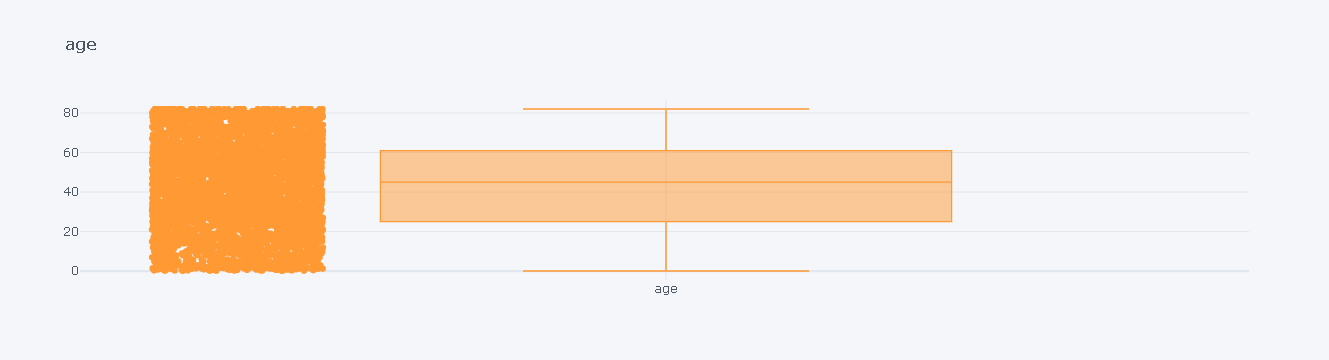

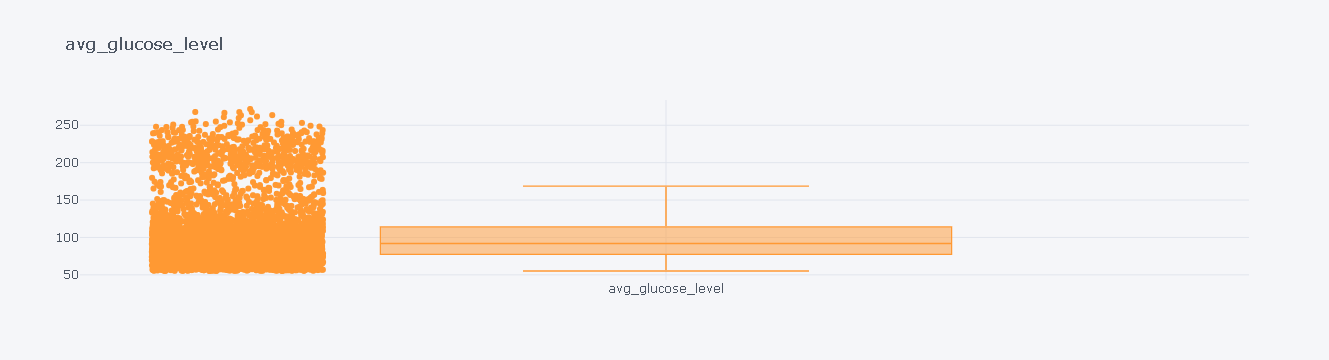

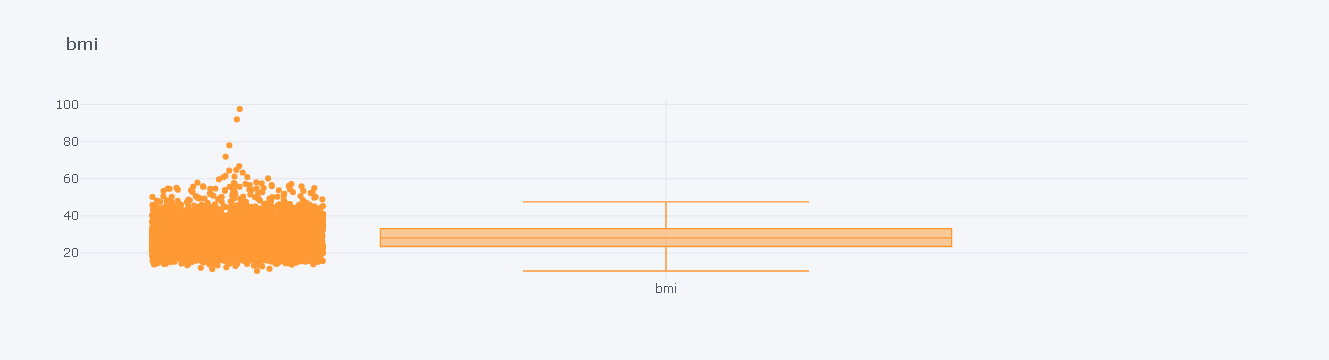

In [35]:
for i in df.drop(columns=["stroke", 'gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'smoking_status']).columns:
    df[i].iplot(kind="box", title=i, boxpoints="all")

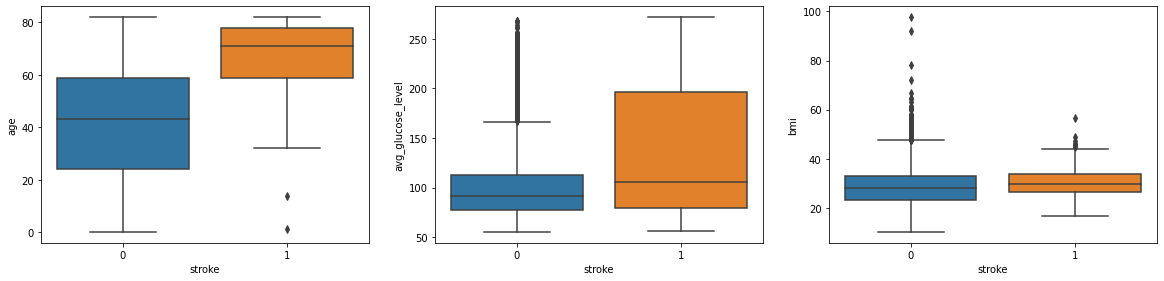

In [36]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.drop(columns=['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'smoking_status']).columns:
    if feature != "stroke":
        index += 1
        plt.subplot(4,3,index)
        sns.boxplot(x='stroke', y=feature, data=df)

In [37]:
df[(df['age'] <= 14) & (df['stroke'] == 1)] 

gender        age  hypertension  heart_disease ever_married work_type  \
162  Female  1.3200000             0              0           No  children   
245  Female 14.0000000             0              0           No  children   

    residence_type  avg_glucose_level        bmi smoking_status  stroke  
162          Urban         70.3700000        NaN        Unknown       1  
245          Rural         57.9300000 30.9000000        Unknown       1

In [38]:
df.age.value_counts()

78.0000000    102
57.0000000     95
52.0000000     90
54.0000000     87
51.0000000     86
79.0000000     85
53.0000000     85
45.0000000     85
50.0000000     83
55.0000000     83
59.0000000     80
31.0000000     79
49.0000000     79
56.0000000     77
37.0000000     76
61.0000000     76
44.0000000     75
47.0000000     75
63.0000000     74
62.0000000     74
40.0000000     74
41.0000000     73
38.0000000     72
60.0000000     72
42.0000000     71
39.0000000     71
32.0000000     71
80.0000000     70
43.0000000     70
34.0000000     68
58.0000000     68
48.0000000     66
5.0000000      65
23.0000000     64
65.0000000     62
46.0000000     62
26.0000000     62
71.0000000     61
81.0000000     60
66.0000000     60
17.0000000     60
18.0000000     60
20.0000000     59
8.0000000      58
25.0000000     57
33.0000000     57
13.0000000     57
82.0000000     56
27.0000000     55
24.0000000     55
30.0000000     55
2.0000000      55
35.0000000     54
14.0000000     54
69.0000000     54
28.0000000

In [39]:
df[df['age'] < 2]

gender       age  hypertension  heart_disease ever_married work_type  \
162   Female 1.3200000             0              0           No  children   
363   Female 0.6400000             0              0           No  children   
376   Female 0.8800000             0              0           No  children   
562   Female 1.8000000             0              0           No  children   
564   Female 0.3200000             0              0           No  children   
597   Female 1.0800000             0              0           No  children   
607   Female 1.8000000             0              0           No  children   
684   Female 1.8000000             0              0           No  children   
753   Female 1.1600000             0              0           No  children   
844     Male 1.0000000             0              0           No  children   
850   Female 1.4000000             0              0           No  children   
913   Female 1.7200000             0              0           No  children   
951     Male 1.0000000             0              0           No  children   
982     Male 0.8800000             0              0           No  children   
995     Male 1.4000000             0              0           No  children   
996     Male 0.2400000             0              0           No  children   
1093  Female 0.3200000             0              0           No  children   
1101    Male 1.6400000             0              0           No  children   
1134    Male 1.5600000             0              0           No  children   
1137    Male 1.7200000             0              0           No  children   
1206  Female 0.7200000             0              0           No  children   
1218    Male 1.8800000             0              0           No  children   
1244  Female 1.2400000             0              0           No  children   
1317    Male 0.8000000             0              0           No  children   
1366    Male 1.0800000             0              0           No  children   
1432    Male 1.0000000             0              0           No  children   
1486    Male 1.8800000             0              0           No  children   
1499  Female 1.2400000             0              0           No  children   
1600    Male 0.4000000             0              0           No  children   
1609  Female 1.2400000             0              0           No  children   
1614  Female 0.0800000             0              0           No  children   
1632  Female 1.4800000             0              0           No  children   
1758    Male 1.7200000             0              0           No  children   
1794    Male 1.0000000             0              0           No  children   
1808  Female 0.6400000             0              0           No  children   
1927  Female 1.4800000             0              0           No  children   
1948  Female 1.4000000             0              0           No  children   
1957  Female 1.5600000             0              0           No  children   
1975    Male 0.5600000             0              0           No  children   
1999    Male 0.2400000             0              0           No  children   
2008    Male 0.5600000             0              0           No  children   
2012    Male 0.6400000             0              0           No  children   
2030    Male 0.4800000             0              0           No  children   
2074    Male 1.3200000             0              0           No  children   
2116    Male 1.2400000             0              0           No  children   
2194    Male 1.7200000             0              0           No  children   
2240  Female 1.0000000             0              0           No  children   
2305    Male 1.0800000             0              0           No  children   
2311  Female 1.1600000             0              0           No  children   
2329  Female 1.8000000             0              0           No  children   
2358    Male 0.8800000      

### Examination of Skewness

In [40]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df[numerical].skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols 

heart_disease       3.9472440
hypertension        2.7153917
avg_glucose_level   1.5722839
bmi                 1.0553402
dtype: float64

Some features have skewness. After visualizing them we will try to handle with their skewness by "np.log" and "PowerTransformer". Let's first take a close look at those in details.

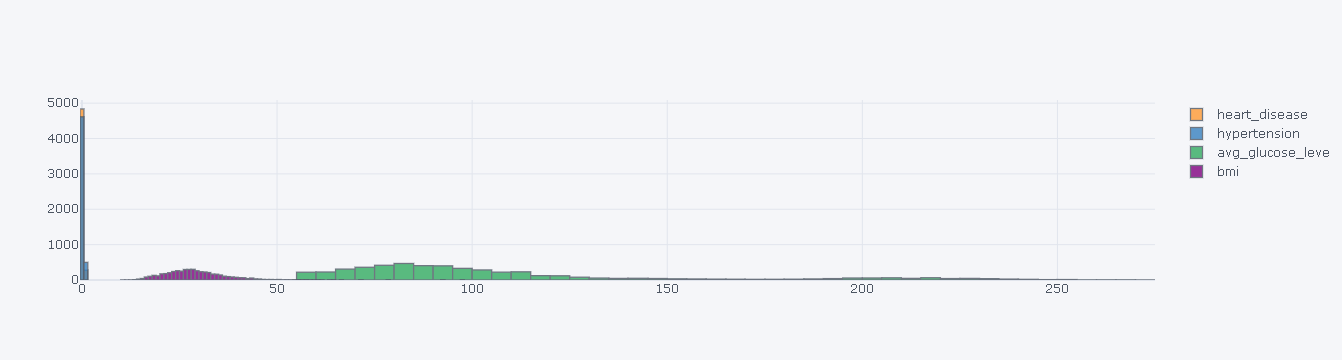

In [41]:
df[skew_cols.index].iplot(kind='hist');

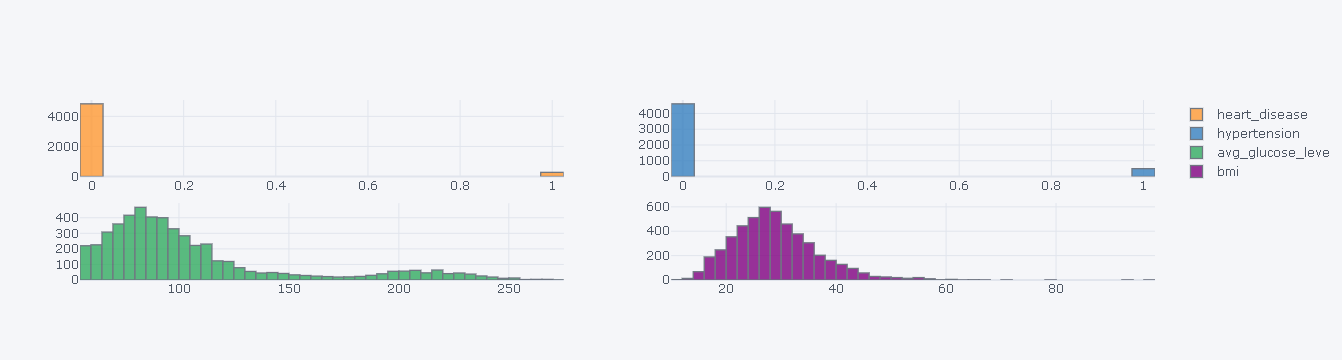

In [42]:
df[skew_cols.index].iplot(kind='histogram',subplots=True,bins=50)

### Handling with Skewness

In [43]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
skew_vals = df[numerical].skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols = skew_cols.drop(['heart_disease', 'hypertension'])
skew_cols

avg_glucose_level   1.5722839
bmi                 1.0553402
dtype: float64

avg_glucose_level   0.8894698
bmi                 0.0319127
dtype: float64



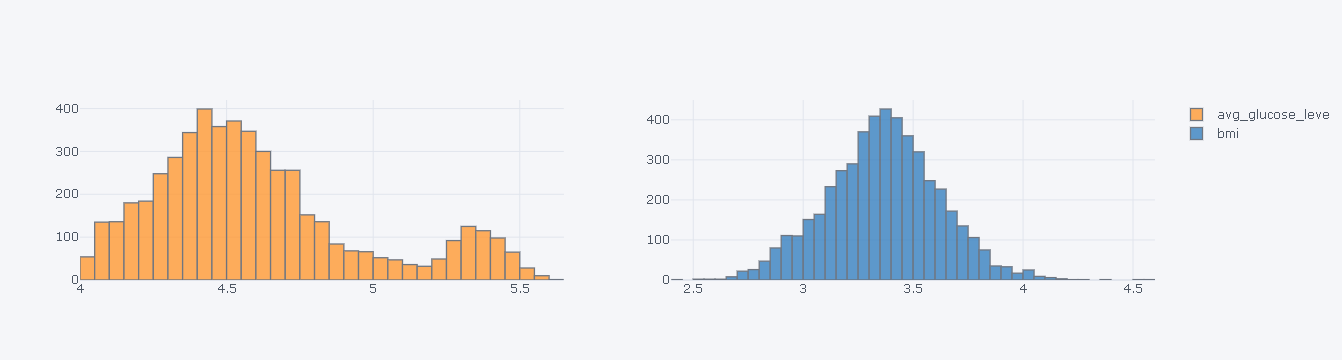

In [44]:
df_try = df.copy()
for col in skew_cols.index.values:
    df_try[col] = df_try[col].apply(np.log1p)
print(df_try[skew_cols.index].skew())
print()
df_try[skew_cols.index].iplot(kind='histogram',subplots=True,bins=50);

***The application of Powertransformer***

avg_glucose_level    0.0845736
bmi                 -0.0007424
dtype: float64



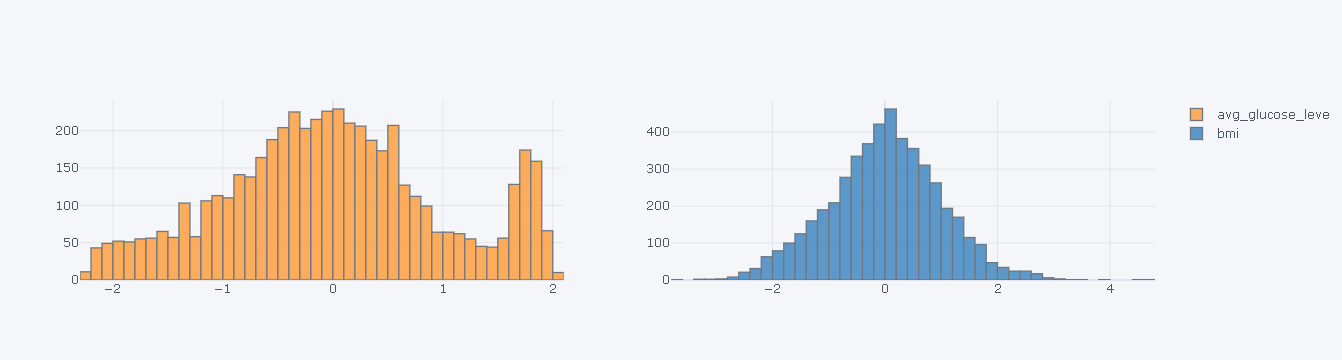

In [45]:
df_trans = df[skew_cols.index].copy()
pt = PowerTransformer(method='yeo-johnson')
trans= pt.fit_transform(df_trans)
df_trans = pd.DataFrame(trans, columns =skew_cols.index )
print(df_trans.skew())
print()
df_trans.iplot(kind='histogram',subplots=True,bins=50);

Now it's time to get rid of these skewed features from our dataset and concatenate unskewed ones with the dataset. 

In [46]:
df.shape

(5110, 11)

In [47]:
df.drop(["avg_glucose_level", "bmi"], axis=1, inplace=True)

In [48]:
df.shape

(5110, 9)

In [49]:
df = pd.concat([df, df_trans], axis=1)

In [50]:
df.shape

(5110, 11)

In the "gender" column there has been an undefined classification which makes no contribution to understand stroke. So let's discard this row from the analysis.

In [51]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [52]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)

In [53]:
df.head(2)

gender        age  hypertension  heart_disease ever_married      work_type  \
0    Male 67.0000000             0              1          Yes        Private   
1  Female 61.0000000             0              0          Yes  Self-employed   

  residence_type   smoking_status  stroke  avg_glucose_level       bmi  
0          Urban  formerly smoked       1          1.8623579 1.0256983  
1          Rural     never smoked       1          1.7004136       NaN

In [54]:
missing(df)

Missing_Number  Missing_Percent
bmi                           201        0.0393423
gender                          0        0.0000000
age                             0        0.0000000
hypertension                    0        0.0000000
heart_disease                   0        0.0000000
ever_married                    0        0.0000000
work_type                       0        0.0000000
residence_type                  0        0.0000000
smoking_status                  0        0.0000000
stroke                          0        0.0000000
avg_glucose_level               0        0.0000000

# Categorical Features

In [55]:
df[categorical].head().T

0              1             2        3  \
gender                     Male         Female          Male   Female   
ever_married                Yes            Yes           Yes      Yes   
work_type               Private  Self-employed       Private  Private   
residence_type            Urban          Rural         Rural    Urban   
smoking_status  formerly smoked   never smoked  never smoked   smokes   

                            4  
gender                 Female  
ever_married              Yes  
work_type       Self-employed  
residence_type          Rural  
smoking_status   never smoked

In [56]:
df[categorical].describe()

gender ever_married work_type residence_type smoking_status
count     5109         5109      5109           5109           5109
unique       2            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2924           2596           1892

In [57]:
def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))


# To view summary information about the column

### gender & stroke

In [58]:
first_looking("gender")

column name    :  gender
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
Female    2994
Male      2115
Name: gender, dtype: int64


gender
Female   0.0470942
Male     0.0510638
Name: stroke, dtype: float64



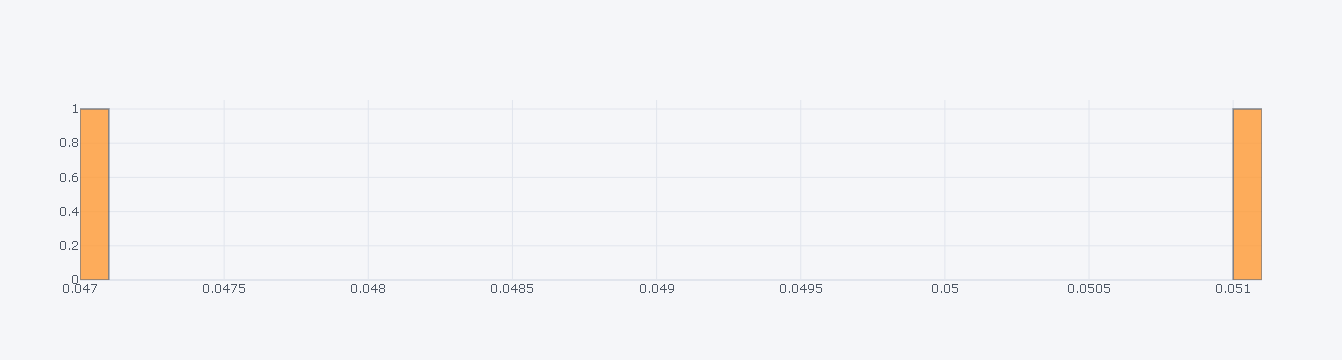

In [59]:
print(df.groupby('gender')['stroke'].mean().sort_values())
print()
df.groupby('gender')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

### ever_married & stroke

In [60]:
first_looking("ever_married")

column name    :  ever_married
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
Yes    3353
No     1756
Name: ever_married, dtype: int64


ever_married
No    0.0165148
Yes   0.0656129
Name: stroke, dtype: float64



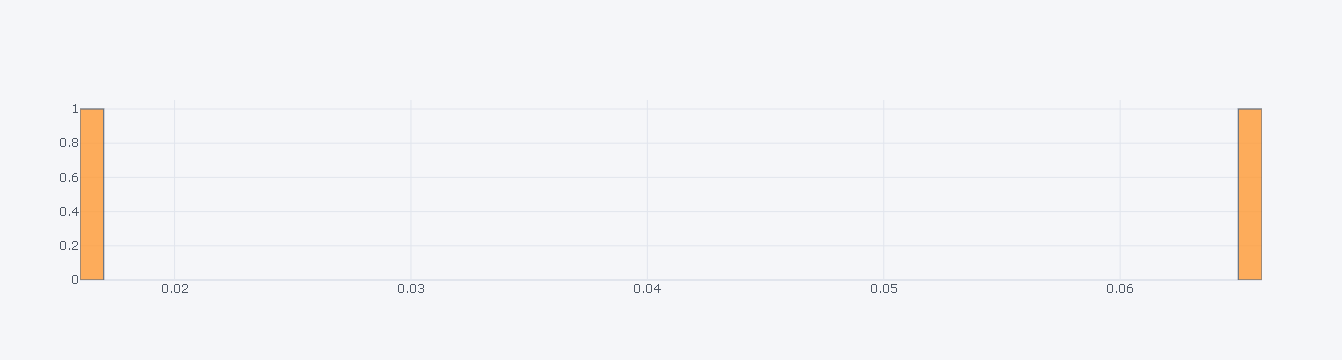

In [61]:
print(df.groupby('ever_married')['stroke'].mean().sort_values())
print()
df.groupby('ever_married')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

### work_type & stroke

In [62]:
first_looking("work_type")

column name    :  work_type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


work_type
Never_worked    0.0000000
children        0.0029112
Govt_job        0.0502283
Private         0.0509576
Self-employed   0.0793651
Name: stroke, dtype: float64



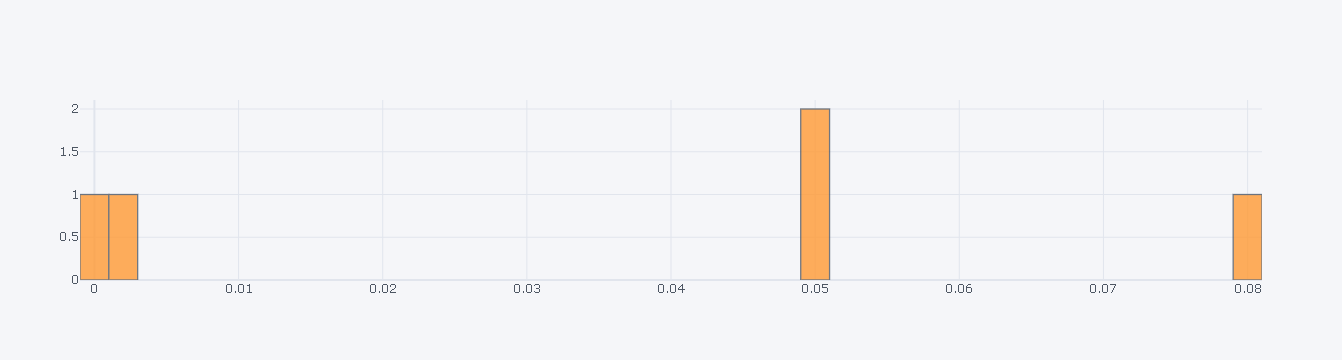

In [63]:
print(df.groupby('work_type')['stroke'].mean().sort_values())
print()
df.groupby('work_type')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

### residence_type & stroke

In [64]:
first_looking("residence_type")

column name    :  residence_type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
Urban    2596
Rural    2513
Name: residence_type, dtype: int64


residence_type
Rural   0.0453641
Urban   0.0520031
Name: stroke, dtype: float64



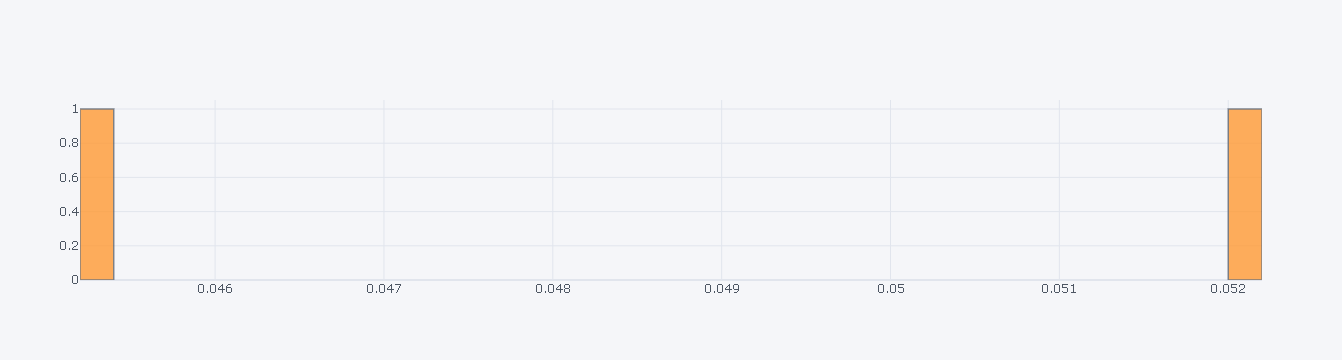

In [65]:
print(df.groupby('residence_type')['stroke'].mean().sort_values())
print()
df.groupby('residence_type')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

### smoking_status & stroke

In [66]:
first_looking("smoking_status")

column name    :  smoking_status
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


smoking_status
Unknown           0.0304404
never smoked      0.0475687
smokes            0.0532319
formerly smoked   0.0791855
Name: stroke, dtype: float64



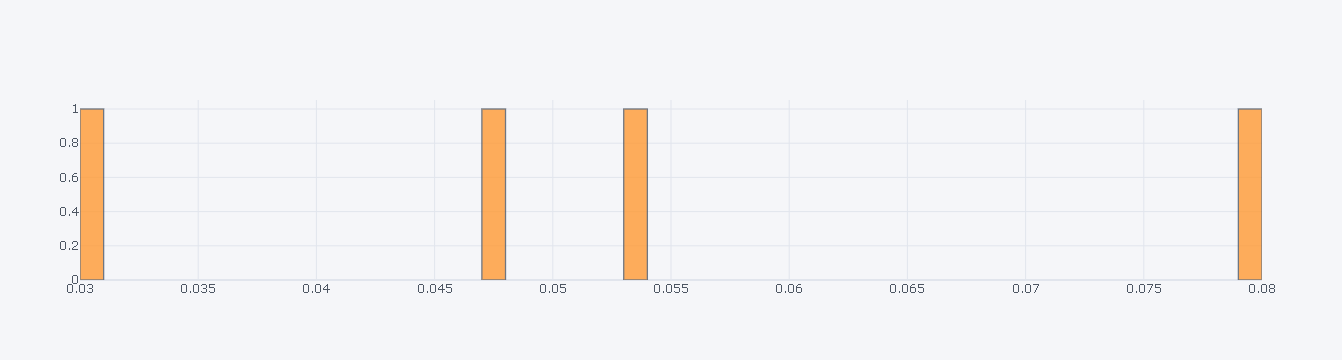

In [67]:
print(df.groupby('smoking_status')['stroke'].mean().sort_values())
print()
df.groupby('smoking_status')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

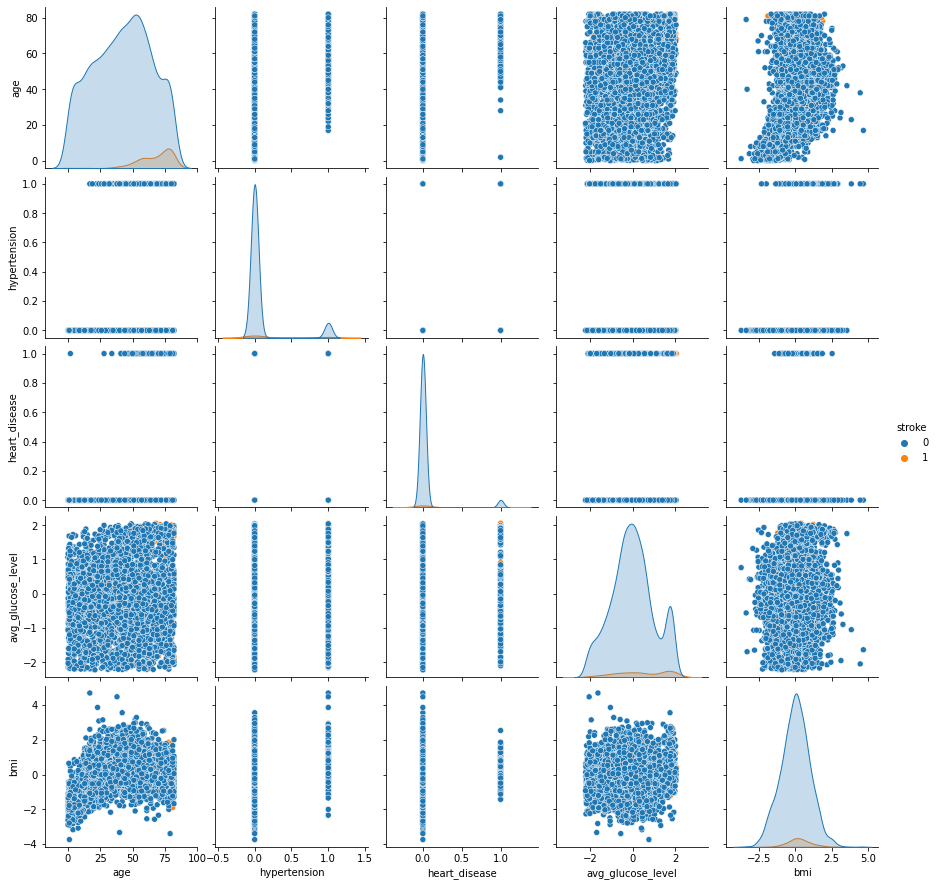

In [68]:
sns.pairplot(df, hue="stroke");

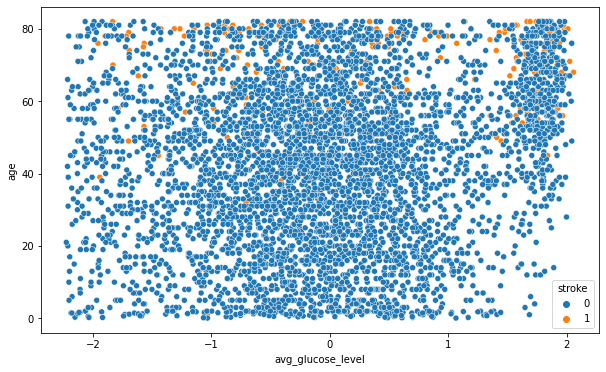

In [69]:
sns.scatterplot(x = 'avg_glucose_level', y = 'age', hue = 'stroke', data = df);

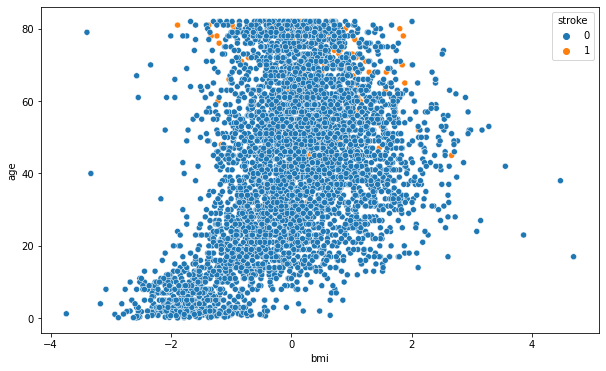

In [70]:
sns.scatterplot(x = 'bmi', y = 'age', hue = 'stroke', data = df);

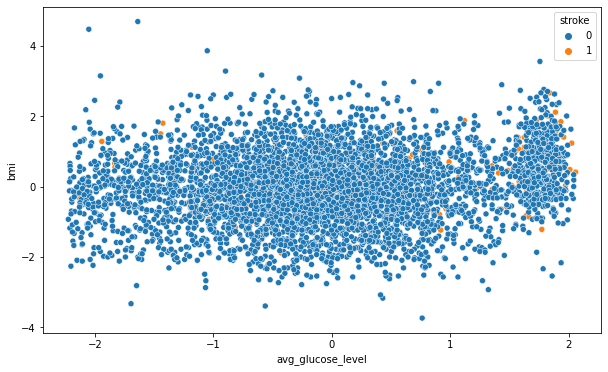

In [71]:
sns.scatterplot(x = 'avg_glucose_level', y = 'bmi', hue = 'stroke', data = df);

In [72]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'smoking_status', 'stroke',
       'avg_glucose_level', 'bmi'],
      dtype='object')

In [73]:
df = pd.get_dummies(df, columns=['gender', 'ever_married',
       'work_type', 'residence_type', 'smoking_status',], drop_first=True)

In [74]:
df.head()

age  hypertension  heart_disease  stroke  avg_glucose_level  \
0 67.0000000             0              1       1          1.8623579   
1 61.0000000             0              0       1          1.7004136   
2 80.0000000             0              1       1          0.3947141   
3 49.0000000             0              0       1          1.4449411   
4 79.0000000             1              0       1          1.4727475   

         bmi  gender_Male  ever_married_Yes  work_type_Never_worked  \
0  1.0256983            1                 1                       0   
1        NaN            0                 1                       0   
2  0.5773829            1                 1                       0   
3  0.7918351            0                 1                       0   
4 -0.5679023            0                 1                       0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                  1                        0                   0   
1                  0                        1                   0   
2                  1                        0                   0   
3                  1                        0                   0   
4                  0                        1                   0   

   residence_type_Urban  smoking_status_formerly smoked  \
0                     1                               1   
1                     0                               0   
2                     0                               0   
3                     1                               0   
4                     0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            1                      0  
3                            0                      1  
4                            1                      0

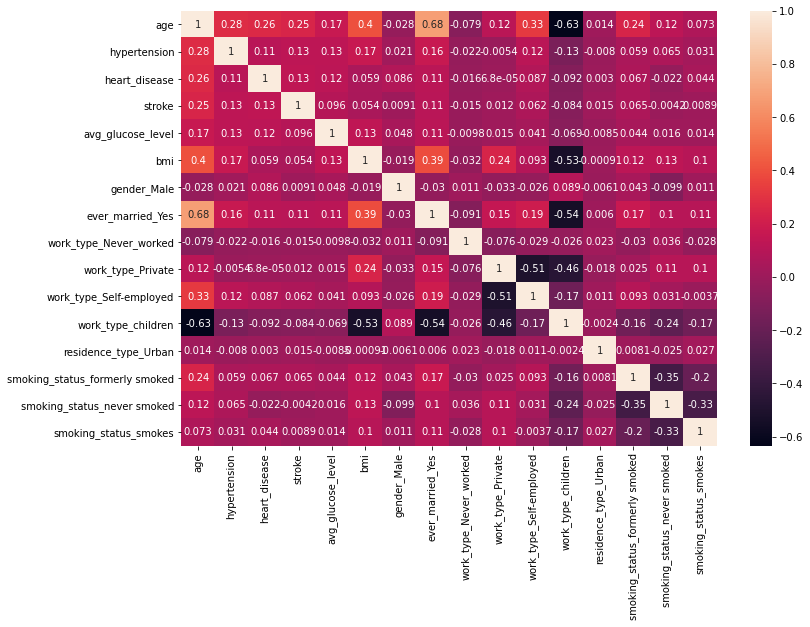

In [75]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True);

In [76]:
df.shape

(5109, 16)

## The Implementattion of Logistic Methods

### Train | Test Split and Scaling

In [77]:
X = df.drop(columns=["stroke"])
y = df.stroke

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
# from sklearn.impute import SimpleImputer

# # from sklearn.cross_validation import train_test_split
# from sklearn.cross_validation import cross_val_score
# from sklearn import datasets
# from sklearn import svm

In [80]:
# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_test, y_train, y_test))

MAE from Approach 2 (Imputation):


NameError: name 'score_dataset' is not defined

In [ ]:
# imputed_X_train.isnull().sum()

In [ ]:
# imputed_X_test.isnull().sum()

In [ ]:
# imputed_X_train.age.value_counts().head(10)

In [ ]:
X_train.age.value_counts().head(10)

In [ ]:
X_test = imputed_X_test

In [ ]:
X_train = imputed_X_train

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model=LogisticRegression(class_weight="balanced").fit(X_train_scaled, y_train)

In [ ]:
y_pred = log_model.predict(X_test_scaled)

# Model Performance on Classification Tasks

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

 # Crossvalidation

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
model = LogisticRegression(class_weight="balanced")

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

In [ ]:
# models.append(("LDA", LinearDiscriminantAnalysis()))
# models.append(("KNN", KNeighborsClassifier()))
# models.append(("DT", DecisionTreeClassifier()))
# models.append(("GB", GaussianNB()))
# models.append(("SVC", SVC()))

# # evaluate each model in turn

# results = []
# names = []

# for name, model in models:
#     kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
#     cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    
#     results.append(cv_results)
#     names.append(name)
    
#     print(f"{name}: {round(cv_results.mean(), 4)} ({round(cv_results.std(), 4)})")